### Importing the required libraries:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Reading the data files:

In [2]:
ratings = pd.read_table("/Users/Saarthak92/Desktop/ratings.dat",sep='::',names=['user','movie','rating','time'])
users = pd.read_table("/Users/Saarthak92/Desktop/users.dat",sep='::',names=['user','gender','age','occupation','zip'])
movies = pd.read_table("/Users/Saarthak92/Desktop/movies.dat",sep='::',names=['movie','title','genre'])

/Users/Saarthak92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/Saarthak92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Users/Saarthak92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engi

### Analyzing the individual files:

#### Ratings:

In [3]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user      1000209 non-null int64
movie     1000209 non-null int64
rating    1000209 non-null int64
time      1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
None


In [4]:
print(ratings.head())

   user  movie  rating       time
0     1   1193       5  978300760
1     1    661       3  978302109
2     1    914       3  978301968
3     1   3408       4  978300275
4     1   2355       5  978824291


In [5]:
print(ratings.tail())

         user  movie  rating       time
1000204  6040   1091       1  956716541
1000205  6040   1094       5  956704887
1000206  6040    562       5  956704746
1000207  6040   1096       4  956715648
1000208  6040   1097       4  956715569


The ratings dataset consists of 4 variables:
    
    user : userID of the person who rated the movie
    movie : movieID of the corresponding movie that has been rated
    rating : rating of the movie; based on 5-star rating (whole numbers only)
    time : timestamp (in seconds) since movie has been rated

Each user has rated at least 20 movies.

#### Users:

In [6]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user          6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None


In [7]:
print(users.head())

   user gender  age  occupation    zip
0     1      F    1          10  48067
1     2      M   56          16  70072
2     3      M   25          15  55117
3     4      M   45           7  02460
4     5      M   25          20  55455


In [8]:
print(users.tail())

      user gender  age  occupation    zip
6035  6036      F   25          15  32603
6036  6037      F   45           1  76006
6037  6038      F   56           1  14706
6038  6039      F   45           0  01060
6039  6040      M   25           6  11106


The users dataset consists of 5 variables:
    
    user : userID of the person who rated the movie
    gender : gender of the corresponding user (M or F)
    zip : zipcode of corresponding user
    age : age category of the corresponding user;       *  1:  "Under 18"
                                                        * 18:  "18-24"
                                                        * 25:  "25-34"
                                                        * 35:  "35-44"
                                                        * 45:  "45-49"
                                                        * 50:  "50-55"
                                                        * 56:  "56+"
                                                            
    occupation : occupation of the corresponding user;  *  0:  "other" or not specified
                                                        *  1:  "academic/educator"
                                                        *  2:  "artist"
                                                        *  3:  "clerical/admin"
                                                        *  4:  "college/grad student"
                                                        *  5:  "customer service"
                                                        *  6:  "doctor/health care"
                                                        *  7:  "executive/managerial"
                                                        *  8:  "farmer"
                                                        *  9:  "homemaker"
                                                        * 10:  "K-12 student"
                                                        * 11:  "lawyer"
                                                        * 12:  "programmer"
                                                        * 13:  "retired"
                                                        * 14:  "sales/marketing"
                                                        * 15:  "scientist"
                                                        * 16:  "self-employed"
                                                        * 17:  "technician/engineer"
                                                        * 18:  "tradesman/craftsman"
                                                        * 19:  "unemployed"
                                                        * 20:  "writer" 
    

There are 6040 userIDs in total. Each user has rated atleast 20 movies.

#### Movies:

In [9]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie    3883 non-null int64
title    3883 non-null object
genre    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None


In [10]:
print(movies.head())

   movie                               title                         genre
0      1                    Toy Story (1995)   Animation|Children's|Comedy
1      2                      Jumanji (1995)  Adventure|Children's|Fantasy
2      3             Grumpier Old Men (1995)                Comedy|Romance
3      4            Waiting to Exhale (1995)                  Comedy|Drama
4      5  Father of the Bride Part II (1995)                        Comedy


In [11]:
print(movies.tail())

      movie                       title           genre
3878   3948     Meet the Parents (2000)          Comedy
3879   3949  Requiem for a Dream (2000)           Drama
3880   3950            Tigerland (2000)           Drama
3881   3951     Two Family House (2000)           Drama
3882   3952       Contender, The (2000)  Drama|Thriller


The movies dataset consists of 3 variables:
    
    movie : movieID of the movie that has been rated
    title : actual name of the movie
    genre : genre of the movie. A movie may fall under multiple genres.

There are 3883 movies in total.

Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries.

In order to overcome these short comings, we merge the 3 data sets.

### Merging the files to create the data set: movielens

In [12]:
movielens = pd.merge(pd.merge(ratings,users),movies)
movielens = movielens.drop_duplicates()

In [13]:
movielens.shape

(1000209, 10)

In [14]:
print(movielens.head())

   user  movie  rating       time gender  age  occupation    zip  \
0     1   1193       5  978300760      F    1          10  48067   
1     2   1193       5  978298413      M   56          16  70072   
2    12   1193       4  978220179      M   25          12  32793   
3    15   1193       4  978199279      M   25           7  22903   
4    17   1193       5  978158471      M   50           1  95350   

                                    title  genre  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama  


##### Separating the TITLE into NAME and YEAR

In [15]:
movielens["name"] = movielens.title.str.split('(').str.get(0)

In [16]:
movielens["year"] = movielens.title.str.split('(').str.get(1)
movielens["year"] = movielens.year.str.split(')').str.get(0)

##### Dropping redundant columns

In [17]:
movielens = movielens.drop(['time','title'], axis=1)

##### Overview of the final data set

In [18]:
movielens.head()

,user,movie,rating,gender,age,occupation,zip,genre,name,year
0,1,1193,5,F,1,10,48067,Drama,One Flew Over the Cuckoo's Nest,1975
1,2,1193,5,M,56,16,70072,Drama,One Flew Over the Cuckoo's Nest,1975
2,12,1193,4,M,25,12,32793,Drama,One Flew Over the Cuckoo's Nest,1975
3,15,1193,4,M,25,7,22903,Drama,One Flew Over the Cuckoo's Nest,1975
4,17,1193,5,M,50,1,95350,Drama,One Flew Over the Cuckoo's Nest,1975


### Data Wrangling and Exploratory Data Analysis:

##### What does the distribution of ratings look like?

In [19]:
print(movielens['rating'].describe())

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


##### Analyzing the ratings distribution

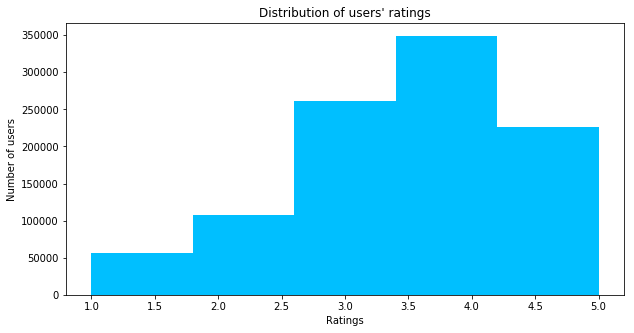

In [20]:
movielens.rating.plot.hist(bins=5, color="deepskyblue", figsize=(10,5))
plt.title("Distribution of users' ratings")
plt.ylabel('Number of users')
plt.xlabel('Ratings')

##### What are the top 100 movies with highest number of reviews?

In [22]:
top100_most_rated = movielens.groupby('name').size().sort_values(ascending=False)[:100]

##### Top 10 on this list:

In [23]:
print(top100_most_rated.head(10))

name
American Beauty                                    3428
Star Wars: Episode IV - A New Hope                 2991
Star Wars: Episode V - The Empire Strikes Back     2990
Star Wars: Episode VI - Return of the Jedi         2883
Jurassic Park                                      2672
Saving Private Ryan                                2653
Terminator 2: Judgment Day                         2649
Matrix, The                                        2590
Back to the Future                                 2583
Silence of the Lambs, The                          2578
dtype: int64


##### Bottom 10 on this list:

In [24]:
print(top100_most_rated.tail(10))

name
High Fidelity                                                            1373
There's Something About Mary                                             1371
Thomas Crown Affair, The                                                 1369
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb     1367
Arachnophobia                                                            1367
Clueless                                                                 1362
Get Shorty                                                               1356
Jerry Maguire                                                            1353
Christmas Story, A                                                       1352
Aladdin                                                                  1351
dtype: int64


##### What are the 100 movies with the least number of reviews?

In [25]:
top100_least_rated = movielens.groupby('name').size().sort_values(ascending=True)[:100]

##### Top 10 on this list:

In [26]:
print(top100_least_rated.head(10))

name
White Boys                    1
For Ever Mozart               1
Even Dwarfs Started Small     1
Foolish                       1
M�nage                        1
Death in Brunswick            1
Relative Fear                 1
Follow the Bitch              1
Chain of Fools                1
Uninvited Guest, An           1
dtype: int64


##### Bottom 10 on this list:

In [27]:
print(top100_least_rated.tail(10))

name
Hippie Revolution, The      1
Wooden Man's Bride, The     1
Project Moon Base           1
Ulysses                     1
Open Season                 1
Trois                       1
Fausto                      1
Low Life, The               1
Condition Red               1
Boy Called Hate, A          1
dtype: int64


We observe that there are at least a 100 movies which have been reviewed only once. Such few reviews 
would make it difficult to recommend these movies. We may exclude such values moving forward.

##### Which users have rated the most movies?

In [28]:
movie_data = movielens[['user','rating']]
ratings_by_user = movie_data.groupby('user').agg([np.size,np.mean])

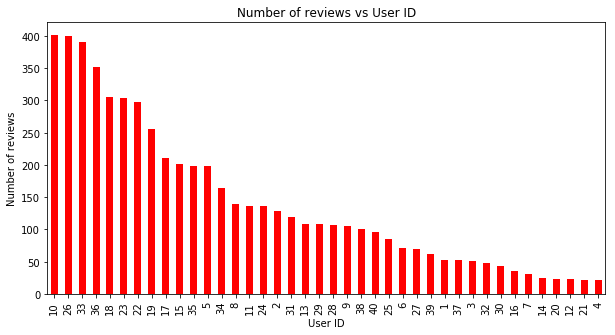

In [29]:
ratings_by_user['rating']['size'].head(40).sort_values(ascending=False).plot(kind="bar", color="red", figsize=(10,5))
plt.xlabel("User ID")
plt.ylabel("Number of reviews")
plt.title("Number of reviews vs User ID")

We observe that only 31 userIDs have rated more than 50 movies. Beyond userID 3, all the remaining users have rated between 20 to 50 movies.

##### Movie ratings based on gender

In [30]:
movie_data2 = movielens[['gender','rating']]
ratings_by_gender = movie_data2.groupby('gender').agg([np.size,np.mean])

##### Based on number of reviews

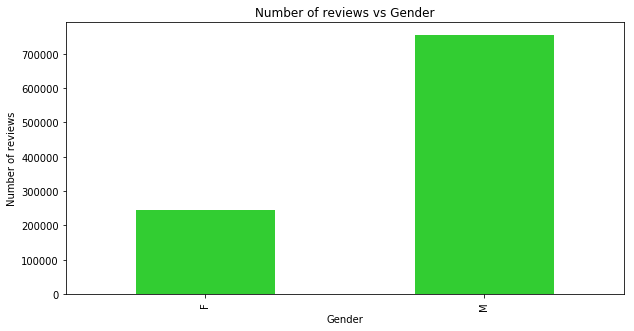

In [31]:
ratings_by_gender['rating']['size'].plot(kind="bar", color="limegreen", figsize=(10,5))
plt.xlabel("Gender")
plt.ylabel("Number of reviews")
plt.title("Number of reviews vs Gender")

We observe that a vast majority of the reviewers (roughly 70%) are men.

##### Based on average rating

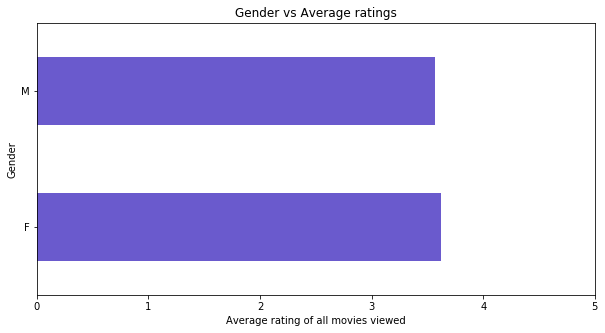

In [32]:
ratings_by_gender['rating']['mean'].plot(kind="barh", color="slateblue", figsize=(10,5))
plt.xlabel("Average rating of all movies viewed")
plt.ylabel("Gender")
plt.xlim(0,5)
plt.title("Gender vs Average ratings")

There does not appear to be any bias in terms of averaging ratings for movies, based on the gender of the viewer.

##### Movie ratings based on occupation of user

In [33]:
movie_data3 = movielens[['occupation','rating']]
ratings_by_occupation = movie_data3.groupby('occupation').agg([np.size,np.mean])

##### Based on number of reviews

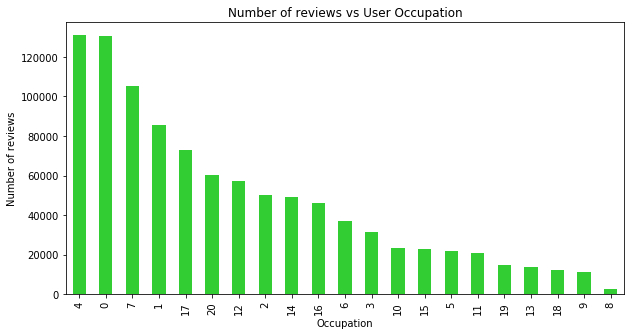

In [34]:
ratings_by_occupation['rating']['size'].sort_values(ascending=False).plot(kind="bar", color="limegreen", figsize=(10,5))
plt.xlabel("Occupation")
plt.ylabel("Number of reviews")
plt.title("Number of reviews vs User Occupation")

In [35]:
ratings_by_occupation['rating']['size'].sort_values(ascending=False).head(3)

occupation
4    131032
0    130499
7    105425
Name: size, dtype: int64

In [36]:
ratings_by_occupation['rating']['size'].sort_values(ascending=False).tail(3)

occupation
18    12086
9     11345
8      2706
Name: size, dtype: int64

We observe that:
- roughly 13% of reviews are from college/grad students (Group 4)
- roughly 10% of the reviews are from users who serve in executive/managerial positions (Group 7).
- another major chunk of the reviews (nearly 13%) are from people who have not specified their 
  occupation (Group 0).
- the occupations responsible for the least number of reviews are farmers (Group 8), homemakers (Group 9),
  traders (Group 18), retired individuals (Group 13) and unemployed individuals (Group 19).

##### Based on average rating

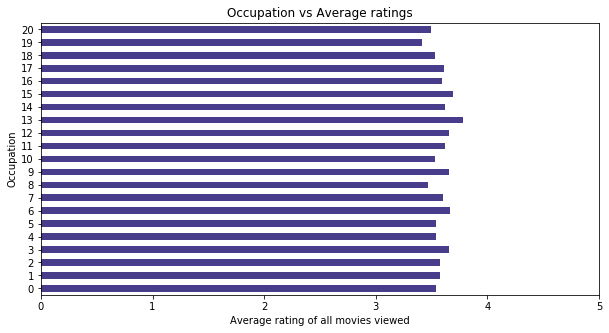

In [37]:
ratings_by_occupation['rating']['mean'].plot(kind="barh", color="darkslateblue", figsize=(10,5) )
plt.xlabel("Average rating of all movies viewed")
plt.ylabel("Occupation")
plt.xlim(0,5)
plt.title("Occupation vs Average ratings")

In [38]:
ratings_by_occupation['rating']['mean'].sort_values(ascending=False).head(3)

occupation
13    3.781736
15    3.689774
6     3.661578
Name: mean, dtype: float64

In [39]:
ratings_by_occupation['rating']['mean'].sort_values(ascending=False).tail(3)

occupation
20    3.497392
8     3.466741
19    3.414050
Name: mean, dtype: float64

We observe that:
    - retired individuals (Group 13) have the highest average ratings for all movies viewed.
    - unemployed individuals (Group 19) have the lowest average ratings for all movies viewed.
    - writers (Group 20), farmers (Group 8) and unemployed individuals seem most critical in rating movies.

##### What are the 10 highest rated movies of all time?

In [41]:
highest_rated_movies = movielens.groupby('name').agg({'rating': [np.size, np.mean]})

In [42]:
print(highest_rated_movies.sort_values([('rating', 'mean')], ascending=False).head(10))

                             rating     
                               size mean
name                                    
Schlafes Bruder                   1  5.0
Smashing Time                     2  5.0
Gate of Heavenly Peace, The       3  5.0
Follow the Bitch                  1  5.0
Song of Freedom                   1  5.0
Baby, The                         1  5.0
Lured                             1  5.0
One Little Indian                 1  5.0
Bittersweet Motel                 1  5.0
Ulysses                           1  5.0


We observe that a lot of movies with very high ratings, have limited number of reviews.This does not give us a good
indication of how good a movie really is. Essentially, these results may be biased. In order to reduce this bias, we 
consider movies that have atleast 150 reviews.

In [43]:
atleast_150_reviews = highest_rated_movies['rating']['size'] >= 150

##### Highest rated movies with atleast 150 reviews:

In [44]:
print(highest_rated_movies[atleast_150_reviews].sort_values([('rating', 'mean')], ascending=False)[:10])

                           rating          
                             size      mean
name                                       
Seven Samurai                 628  4.560510
Shawshank Redemption, The    2227  4.554558
Godfather, The               2223  4.524966
Close Shave, A                657  4.520548
Usual Suspects, The          1783  4.517106
Schindler's List             2304  4.510417
Wrong Trousers, The           882  4.507937
Sunset Blvd.                  470  4.491489
Raiders of the Lost Ark      2514  4.477725
Rear Window                  1050  4.476190


This list seems far more reasonable. Infact, these rankings are fairly close to popular websites such 
as imdb and rotten tomatoes.

##### What are the 10 lowest rated movies (having at least 150 reviews) ?

In [45]:
print(highest_rated_movies[atleast_150_reviews].sort_values([('rating', 'mean')], ascending=True)[:10])

                                           rating          
                                             size      mean
name                                                       
Battlefield Earth                             342  1.611111
Baby Geniuses                                 164  1.701220
Police Academy 5: Assignment: Miami Beach     150  1.766667
Stop! Or My Mom Will Shoot                    179  1.782123
Jaws 3-D                                      210  1.852381
Speed 2: Cruise Control                       367  1.871935
Spice World                                   190  1.873684
Super Mario Bros.                             350  1.874286
Home Alone 3                                  154  1.876623
Superman IV: The Quest for Peace              332  1.888554


##### How are the movies rated, based on the age of the viewer?

The existing age variable is numeric and does not offer an explicit meaning. We modify the variables as follows:

In [46]:
movielens['age'].replace([1,18,25,35,45,50,56],["U-18","18-24","25-34","35-44","45-49","50-55","56+"],inplace=True)

In [47]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user          1000209 non-null int64
movie         1000209 non-null int64
rating        1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null object
occupation    1000209 non-null int64
zip           1000209 non-null object
genre         1000209 non-null object
name          1000209 non-null object
year          1000209 non-null object
dtypes: int64(4), object(6)
memory usage: 123.9+ MB


##### Average rating based on age category, for all movies:

In [49]:
print(movielens.groupby('age').agg({'rating': [np.size, np.mean]}))

       rating          
         size      mean
age                    
18-24  183536  3.507573
25-34  395556  3.545235
35-44  199003  3.618162
45-49   83633  3.638062
50-55   72490  3.714512
56+     38780  3.766632
U-18    27211  3.549520


We observe that, on average, the users belonging to lower age groups appear to be more critical in rating movies.

##### Average rating based on age category, for the top 100 most rated movies

In [50]:
top100_most_rated = movielens.groupby('movie').size().sort_values(ascending=False)[:100]

In [51]:
movielens.set_index('movie', inplace=True)

In [53]:
ratings_by_age = movielens.loc[top100_most_rated.index].groupby(['name', 'age'])

##### Displaying the ratings by age for the first 10 entries:

In [54]:
ratings_by_age.rating.mean().unstack(1).fillna(0)[:10]

age,18-24,25-34,35-44,45-49,50-55,56+,U-18
name,,,,,,,
2001: A Space Odyssey,3.923404,4.024712,4.080940,4.168478,4.241379,4.118280,4.150000
"Abyss, The",3.893939,3.614509,3.686217,3.683099,3.513514,3.509091,3.909091
Airplane!,4.076667,4.002821,3.893805,3.931973,4.008696,3.731707,3.794872
Aladdin,3.748555,3.775194,3.962500,3.962963,3.523810,3.400000,3.658824
Alien,3.922078,4.252513,4.200000,4.164894,4.109677,4.070423,4.000000
Aliens,4.131833,4.196382,4.133508,4.087591,3.844262,3.883333,3.970588
Amadeus,4.117978,4.233141,4.210210,4.406250,4.386555,4.400000,4.240000
American Beauty,4.521678,4.330585,4.231156,4.151163,4.149194,4.108696,4.434783
American Pie,3.751185,3.783871,3.534483,3.333333,3.232558,3.160000,4.052632


Moving forward, we will consider movies having atleast 150 reviews.

### Creating a new variable in our dataframe to store the number of reviews of each movies: n_reviews

In [55]:
movielens['n_reviews'] = movielens.groupby('movie').size()

Modifying our dataframe to meet the threshold requirements:

In [56]:
movielens = movielens.loc[movielens.n_reviews >= 150]

In [57]:
movielens.shape

(900589, 10)

##### Which movies do men and women differ on?

In [59]:
movies_pivot = movielens.pivot_table(index=['movie', 'name'],
                           columns=['gender'],
                           values='rating',
                           fill_value=0)

In [60]:
movies_pivot['diff'] = movies_pivot.M - movies_pivot.F

In [61]:
movies_pivot.reset_index('movie', inplace=True)
disagreements = movies_pivot[movies_pivot.movie.isin(top100_most_rated.index)]['diff']

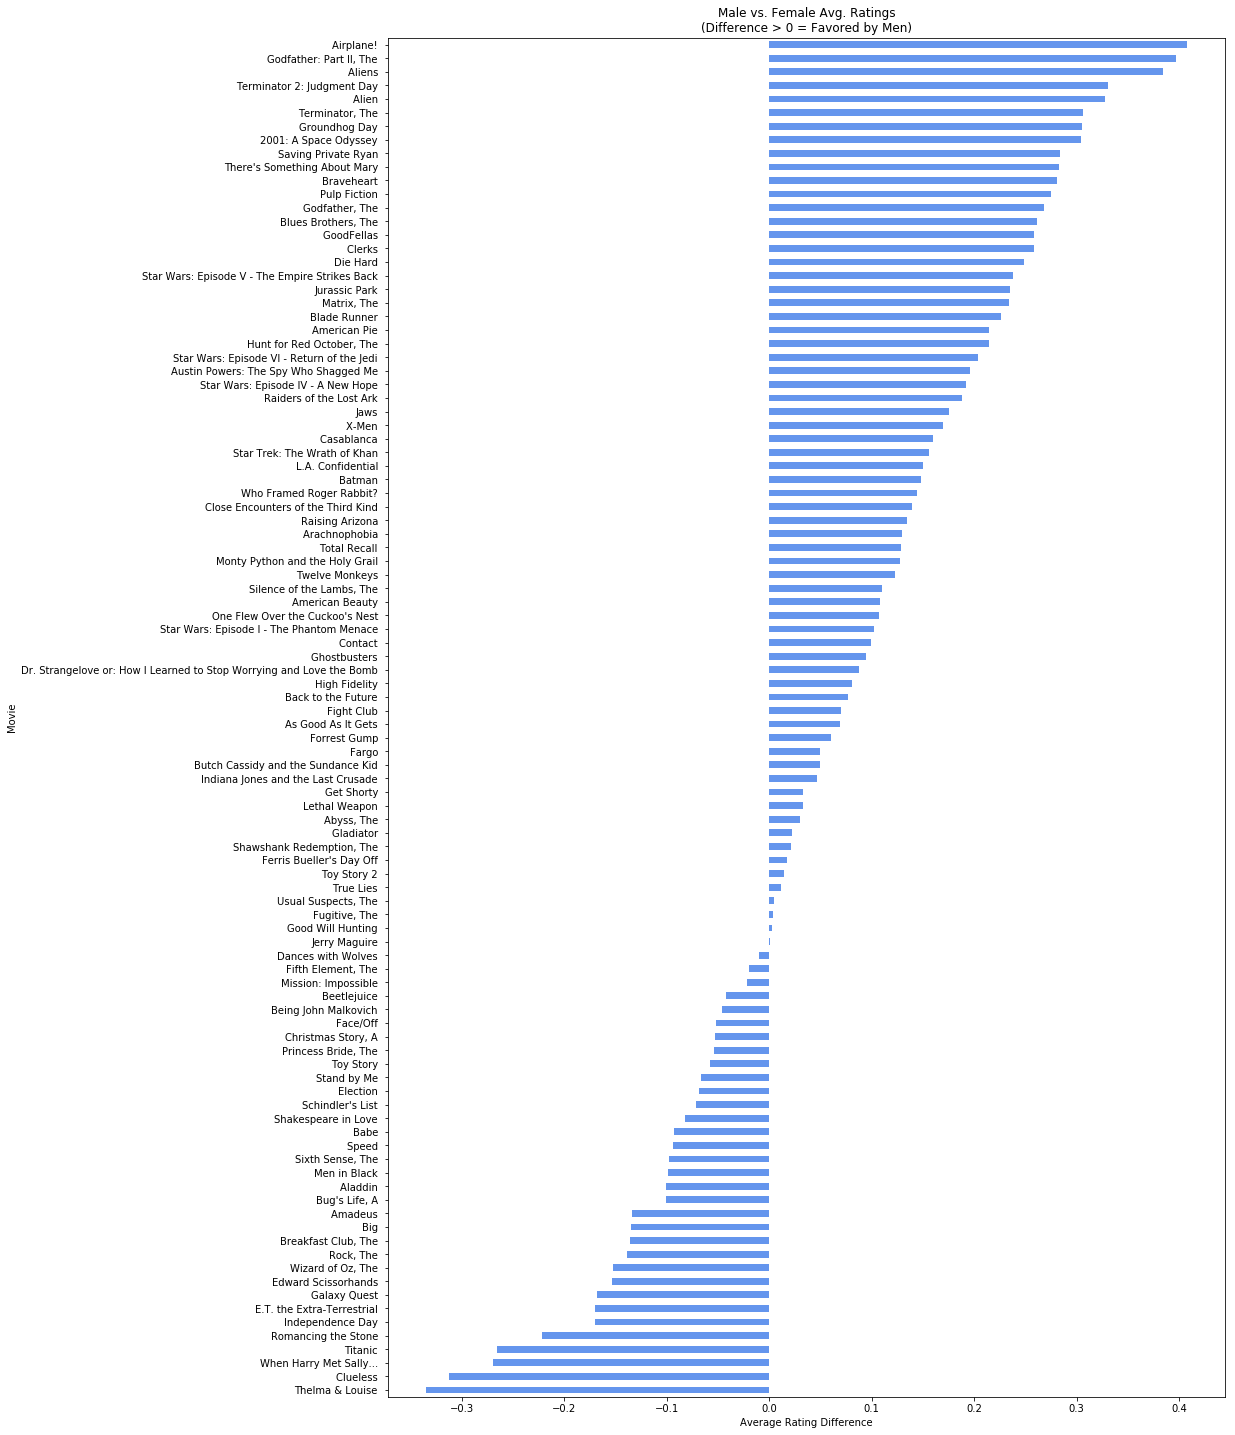

In [62]:
disagreements.sort_values().plot(kind='barh', figsize=[15, 25], color="cornflowerblue")
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Movie')
plt.xlabel('Average Rating Difference')

### Recommendation Systems:

We will design our recommendation system based on collaborative filtering. This algorithm has a very interesting 
property of being able to do feature learning on its own, which means that it can start to learn for itself what
features to use. 

CF can be divided into:
    * Memory-Based Collaborative Filtering
    * Model-Based Collaborative filtering

We will design:
    * Memory-Based CF by computing cosine similarity
    * Model-Based CF by using singular value decomposition (SVD) 

#### Memory-Based Collaborative Filtering:

Memory-Based Collaborative Filtering approaches can be divided into two main sections: 
    
    * user-item filtering : “Users who are similar to you also liked …”
    * item-item filtering : “Users who liked this item also liked …”
    
In both cases, you create a user-item matrix which we build from the entire dataset.

In [64]:
ratings_pivot = ratings.pivot(index = 'user', columns ='movie', values = 'rating').fillna(0)

In [66]:
ratings_pivot.head()

movie,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Converting to matrix form

ratings_matrix = ratings_pivot.as_matrix()

In [68]:
#Normalizing the matrix

user_ratings_mean = np.mean(ratings_matrix, axis = 1)
ratings_normalized = ratings_matrix - user_ratings_mean.reshape(-1, 1)

In [69]:
#Splitting data into train and test set

from sklearn import cross_validation as cv

train_matrix, test_matrix = cv.train_test_split(ratings_normalized, test_size=0.25)

/Users/Saarthak92/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We use the pairwise_distances function from sklearn to calculate the cosine similarity. The output will 
range from 0 to 1 since the ratings are all positive.

In [70]:
from sklearn.metrics.pairwise import pairwise_distances

user_similarity = pairwise_distances(train_matrix, metric='cosine')
item_similarity = pairwise_distances(train_matrix.T, metric='cosine')

Next, we make predictions

In [71]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        #You use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'movie':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

The above function can be explained as follows:
    
* user-item CF:
            The idea here is that some users may tend always to give high or low ratings to all movies. The 
            relative difference in the ratings that these users give is more important than the absolute values. 
            Suppose a user gives 4 stars to his/her favourite movies and 3 stars to all other good movies while
            another user rates movies that he/she likes with 5 stars, and the movies he/she fell asleep over 
            with 3 stars. These two users could have a very similar taste but treat the rating system differently.

* item-item CF: 
            When making a prediction for item-based CF, we do not need to correct for users average rating since
            query user itself is used to do predictions.

In [72]:
item_prediction = predict(train_matrix, item_similarity, type='movie')
user_prediction = predict(train_matrix, user_similarity, type='user')

##### Evaluating our model

Since you only want to consider predicted ratings that are in the test dataset, you filter out all other elements
in the prediction matrix with prediction[ground_truth.nonzero()].

In [73]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [74]:
print('User-based CF RMSE: ' + str(rmse(user_prediction, test_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_matrix)))

User-based CF RMSE: 0.7182091024244744
Item-based CF RMSE: 0.7780863519870469


#### Model-Based Collaborative Filtering:

Model-based Collaborative Filtering is based on matrix factorization (MF).

MF has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition 
and dimensionality reduction.

Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity
than Memory-based CF.

In [76]:
n_users = ratings.user.unique().shape[0]
n_movies = ratings.movie.unique().shape[0]
print('Number of users = ' + str(n_users) + ' | Number of movies = ' + str(n_movies))

Number of users = 6040 | Number of movies = 3706


In [77]:
sparsity=round(1.0-len(ratings)/float(n_users*n_movies),3)
print('The sparsity level is ' +  str(sparsity*100) + '%')

The sparsity level is 95.5%


A well-known matrix factorization method is Singular Value Decomposition (SVD). Collaborative Filtering can be 
formulated by approximating a matrix X by using SVD.

The general equation can be expressed as follows: 
    
    X = U × S × V_transporse
    
Given mxn matrix X:
   
      * U is an mxr orthogonal matrix.
      * S is an rxr non-negative diagonal matrix.
      * V_transporse is an rxn orthogonal matrix.

Matrix X can be factorized to U, S and V such that:

* Diagonal elements of S are singular values of X
* U matrix represents the feature vectors corresponding to the users in the hidden feature space
* V matrix represents the feature vectors corresponding to the items in the hidden feature space

We make predictions using the dot products of U, S and V_transporse.

In [82]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_matrix, k = 20)
s_diag_matrix=np.diag(s)
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)
print('User-based CF MSE: ' + str(rmse(X_pred, test_matrix)))

User-based CF MSE: 0.8171179789849455


##### Designing a model for Matrix Factorization-based Collaborative Filtering:

In [84]:
U, sigma, Vt = svds(ratings_normalized, k = 50)
sigma = np.diag(sigma)

In [85]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_pivot.columns)

In [86]:
def recommend_movies(predictions_df, user, movies, ratings, num_recommendations=5):
    
    # Get and sort the user's predictions
    user_row_number = user - 1 # UserID starts at 1, not 0
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False) # UserID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = ratings[ratings.user == user]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie', right_on = 'movie').
                     sort_values(['rating'], ascending=False)
                 )

    print('User {0} has already rated {1} movies '.format(user, user_full.shape[0]))
    print('Recommending highest {0} predicted ratings movies not already rated '.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie'].isin(user_full['movie'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie',
               right_on = 'movie').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [88]:
already_rated, predictions = recommend_movies(preds_df, 3, movies, ratings, 10)

User 3 has already rated 51 movies 
Recommending highest 10 predicted ratings movies not already rated 


In [89]:
already_rated

,user,movie,rating,time,title,genre
38,3,1304,5,978298166,Butch Cassidy and the Sundance Kid (1969),Action|Comedy|Western
12,3,1615,5,978297710,"Edge, The (1997)",Adventure|Thriller
31,3,2355,5,978298430,"Bug's Life, A (1998)",Animation|Children's|Comedy
32,3,1197,5,978297570,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
33,3,1198,5,978297570,Raiders of the Lost Ark (1981),Action|Adventure
19,3,260,5,978297512,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
34,3,1378,5,978297419,Young Guns (1988),Action|Comedy|Western
16,3,2167,5,978297600,Blade (1998),Action|Adventure|Horror
37,3,3552,5,978298459,Caddyshack (1980),Comedy
14,3,1259,5,978298296,Stand by Me (1986),Adventure|Comedy|Drama


In [90]:
predictions

,movie,title,genre
2807,2918,Ferris Bueller's Day Off (1986),Comedy
2682,2791,Airplane! (1980),Comedy
2520,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi
898,919,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical
0,1,Toy Story (1995),Animation|Children's|Comedy
2695,2804,"Christmas Story, A (1983)",Comedy|Drama
107,110,Braveheart (1995),Action|Drama|War
2608,2716,Ghostbusters (1984),Comedy|Horror
1264,1307,When Harry Met Sally... (1989),Comedy|Romance
2290,2396,Shakespeare in Love (1998),Comedy|Romance


We see that the results of our model-based CF recommender system are reasonably good.